# Определение перспективного тарифа для телеком-компании

## Введение


**Заказчик** — коммерческий департамент компании «Мегалайн»

**Цель исследования** 

* Определить какой тариф приносит больше денег "Смарт" или "Ультра"?


**Входные данные**  — Данные 500 пользователей кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.


**Результаты исследования** — проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов

**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

**Примечание**

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

## Подготовка данных

### Изучение данных

In [1]:
# добавляем лучше место для хорошего... работы с данными - библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns

In [2]:
# загрузка базы
df_users = pd.read_csv('datasets/users.csv')
df_calls = pd.read_csv('datasets/calls.csv')
df_messages = pd.read_csv('datasets/messages.csv')
df_internet = pd.read_csv('datasets/internet.csv')
df_tariffs = pd.read_csv('datasets/tariffs.csv')




Таблица `users` (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

Таблица `calls` (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Таблица `messages` (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Таблица `internet` (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Таблица `tariffs` (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со * 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)



In [3]:
#Посмотрим каждую таблицу отдельно

print('информация о пользователях', '\n')
df_users.info()
display(df_users.head())
display(df_users.describe())
print()
print('Число дубликатов:', df_users.duplicated().sum())
print()
print()
# Проблем в наименование столбцов нет. есть пропуски в churn_date (те кто не прервал, надо глянуть кто прервал). 
# reg_date в  формате object, а должен в datetime. tariff стоит проверить какие данные пишутся

print('информация о звонках', '\n')
df_calls.info()
display(df_calls.head())
display(df_calls.describe())
print()
print('Число дубликатов:', df_calls.duplicated().sum())
print()
print()
# Проблем в наименование столбцов нет. что-то странное с id. call_date в  формате object, а должен в datetime.

print('информация о сообщениях', '\n')
df_messages.info()
display(df_messages.head())
display(df_messages.describe())
print()
print('Число дубликатов:', df_messages.duplicated().sum())
print()
print()
# Проблем в наименование столбцов нет. что-то странное с id. message_date в  формате object, а должен в datetime.

print('информация об интернет-сессиях', '\n')
df_internet.info()
display(df_internet.head())
display(df_internet.describe())
print()
print('Число дубликатов:', df_internet.duplicated().sum())
print()
print()
# Проблем в наименование столбцов нет. непонятный столбец Unnamed: 0. что-то странное с id. 
# session_date в  формате object, а должен в datetime.

print('информация о тарифах', '\n')
df_tariffs.info()
display(df_tariffs.head())
print()
print('Число дубликатов:', df_tariffs.duplicated().sum())
print()
print()
# Явных проблем нет.



информация о пользователях 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000



Число дубликатов: 0


информация о звонках 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000



Число дубликатов: 0


информация о сообщениях 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000



Число дубликатов: 0


информация об интернет-сессиях 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000



Число дубликатов: 0


информация о тарифах 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



Число дубликатов: 0




**Промежуточный вывод:**

* Проблем с наименованием столбцов **нет**
* Есть вопросы по столбцам **id** в таблицах: `df_calls`, `df_messages`
* Подозрительный столбец **Unnamed: 0** в таблице: `df_internet`
* Проблема с **форматом даты** в таблицах: `df_calls`, `df_messages`, `df_internet`, `df_tariffs`
* Явных дубликатов нет


### Предобработка данных

Звонки с нулевой продолжительностью - это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Подсчитать:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-* трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Для подсчета нам необходим дополнительный столбец - **месяц**

Пройдем с точечной првоеркой/изменениями по каждому df

In [4]:
df_users.info()

# посмотрим на отказников
display(df_users[~df_users.churn_date.isnull()]) 
## разные, дни, города, тарифы. Общей закономерности не видно

#churn_date в object лучше перевести как и reg_date в datetime
df_users.churn_date = pd.to_datetime(df_users.churn_date)
df_users.reg_date = pd.to_datetime(df_users.reg_date)

#добавляю новый столбец 
df_users['month'] = df_users['reg_date'].dt.month

# Проверю города на неявные дубликаты
display(df_users.city.sort_values().unique()) 
## Визуально все ок

# Посмотрим что получилось
df_users.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart
56,1056,73,2018-10-14,Иркутск,Радислав,Артемьев,2018-04-13,smart
62,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart
63,1063,45,2018-12-11,Тула,Таира,Климова,2018-04-12,ultra
64,1064,55,2018-12-26,Якутск,Динара,Алфеева,2018-03-17,smart
65,1065,53,2018-12-09,Москва,Роза,Игнатова,2018-03-08,smart


array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
 8   month       500 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 35.3+ KB


Придержиавлся логики, что 0 - ноль, а все что больше, уже округляется. даже если он длился всего 1 секунду, будет засчитан как 1 минута. Поправил и добавил проверку "до" и "после"

In [5]:
# Приведу к формату даты
df_calls.call_date = pd.to_datetime(df_calls.call_date)

#добавляю новый столбец 
df_calls['month'] = df_calls['call_date'].dt.month

# округляю звонки в большую сторону, согласно особенностям оператора
#df_calls['duration'] = df_calls['duration'].apply(np.ceil).replace(0, 1)
#df_calls['duration'] = df_calls['duration'].astype('int')
#0 - ноль, 0.1 - 1
print('Было')
print(df_calls['duration'], '\n')
df_calls['duration'] = np.ceil(df_calls.duration).astype(int)
print('Стало')
print(df_calls['duration'])
df_calls.info()


Было
0          0.00
1          0.00
2          2.85
3         13.80
4          5.18
          ...  
202602     0.76
202603    18.83
202604    10.81
202605     4.27
202606    19.62
Name: duration, Length: 202607, dtype: float64 

Стало
0          0
1          0
2          3
3         14
4          6
          ..
202602     1
202603    19
202604    11
202605     5
202606    20
Name: duration, Length: 202607, dtype: int32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 7.0+ MB


In [6]:
# Приведу к формату даты
df_messages.message_date = pd.to_datetime(df_messages.message_date)

#добавляю новый столбец 
df_messages['month'] = df_messages['message_date'].dt.month

df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


In [7]:
# Приведу к формату даты
df_internet.session_date = pd.to_datetime(df_internet.session_date)

#добавляю новый столбец 
df_internet['month'] = df_internet['session_date'].dt.month

#Посмотрим на столбец 
print(df_internet['Unnamed: 0'], '\n')
#Он дублирует индекс, можем удалить
df_internet.drop('Unnamed: 0', axis='columns', inplace=True)

df_internet.info()


0              0
1              1
2              2
3              3
4              4
           ...  
149391    149391
149392    149392
149393    149393
149394    149394
149395    149395
Name: Unnamed: 0, Length: 149396, dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
 4   month         149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


**Промежуточный итог:**

* Привели даты в подходящий формат
* Удалили лишний столбец
* Добавили новый столбец для дальнейших подсчетов
* Округлили минуты до целых и перевели в формат int 


In [8]:
#количество сделанных звонков и израсходованных минут разговора по месяцам;
calls_cs = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc={'count', 'sum'})
calls_cs.columns = ['calls_count', 'duration_sum']
calls_cs

calls_count  duration_sum
user_id month                           
1000    5               22           159
        6               43           172
        7               47           340
        8               52           408
        9               58           466
...                    ...           ...
1498    10              41           247
1499    9                9            70
        10              68           449
        11              74           612
        12              69           492

[3174 rows x 2 columns]

In [9]:
#количество отправленных сообщений по месяцам;
messages_c = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
messages_c.columns = ['messages_count']
messages_c

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

In [10]:
#объем израсходованного интернет-трафика по месяцам;
internet_s = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_s.columns = ['internet_sum']

#Перевожу мб в гиги за шаги
internet_s['internet_sum'] = (internet_s['internet_sum'] / 1024)

#Округляю до целых гигов
internet_s['internet_sum'] = internet_s['internet_sum'].apply(np.ceil).replace(0, 1)
internet_s['internet_sum'] = internet_s['internet_sum'].astype('int')

internet_s

internet_sum
user_id month              
1000    5                 3
        6                23
        7                14
        8                14
        9                15
...                     ...
1498    10               21
1499    9                 2
        10               18
        11               18
        12               13

[3203 rows x 1 columns]

**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

In [11]:
#помесячную выручку с каждого пользователя 

# объеденю смс и звонки
calls_mess_csc = pd.merge(calls_cs, messages_c, how='outer', on=['user_id', 'month'])
calls_mess_csc


calls_count  duration_sum  messages_count
user_id month                                           
1000    5             22.0         159.0            22.0
        6             43.0         172.0            60.0
        7             47.0         340.0            75.0
        8             52.0         408.0            81.0
        9             58.0         466.0            57.0
...                    ...           ...             ...
1489    8              NaN           NaN            17.0
        9              NaN           NaN            32.0
        10             NaN           NaN            21.0
        11             NaN           NaN            20.0
        12             NaN           NaN            35.0

[3213 rows x 3 columns]

In [12]:
# добавлю использованные мб
calls_mess_int_cscs = pd.merge(calls_mess_csc, internet_s, how='outer', on=['user_id', 'month'])

#так как у нас есть месяцы в которых пользователь пользовался чем-то одним, заменим пыстые значения на 0
calls_mess_int_cscs = calls_mess_int_cscs.fillna(0)
calls_mess_int_cscs

calls_count  duration_sum  messages_count  internet_sum
user_id month                                                         
1000    5             22.0         159.0            22.0           3.0
        6             43.0         172.0            60.0          23.0
        7             47.0         340.0            75.0          14.0
        8             52.0         408.0            81.0          14.0
        9             58.0         466.0            57.0          15.0
...                    ...           ...             ...           ...
1489    9              0.0           0.0            32.0          17.0
        10             0.0           0.0            21.0          20.0
        11             0.0           0.0            20.0          18.0
        12             0.0           0.0            35.0          17.0
1476    4              0.0           0.0             0.0           1.0

[3214 rows x 4 columns]

In [13]:
# Для првоерки гипотез нам дополнительно пригодится тариф и города, созданим 
df_united = pd.merge(calls_mess_int_cscs, df_users, how='left', on=['user_id'])

# удалю лишние столбцы churn_date, first_name, last_name, reg_date, reg_date
# В случае если какие-то данные понадобятся можно отменить удаление

df_united = df_united.drop(['churn_date', 'first_name', 'last_name', 'reg_date', 'reg_date'], axis = 1)
display(df_united)
display(df_tariffs)


,user_id,calls_count,duration_sum,messages_count,internet_sum,age,city,tariff,month
0,1000,22.0,159.0,22.0,3.0,52,Краснодар,ultra,5
1,1000,43.0,172.0,60.0,23.0,52,Краснодар,ultra,5
2,1000,47.0,340.0,75.0,14.0,52,Краснодар,ultra,5
3,1000,52.0,408.0,81.0,14.0,52,Краснодар,ultra,5
4,1000,58.0,466.0,57.0,15.0,52,Краснодар,ultra,5
...,...,...,...,...,...,...,...,...,...
3209,1489,0.0,0.0,32.0,17.0,35,Санкт-Петербург,smart,8
3210,1489,0.0,0.0,21.0,20.0,35,Санкт-Петербург,smart,8
3211,1489,0.0,0.0,20.0,18.0,35,Санкт-Петербург,smart,8
3212,1489,0.0,0.0,35.0,17.0,35,Санкт-Петербург,smart,8


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [14]:
#в тарифах указано количество в мб, добавим столбец, сколько ГБ дается на тарифе в месяц для удобства
df_tariffs['gb_per_month_included'] = df_tariffs['mb_per_month_included']/1024
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


In [15]:
#Функция посчета выручки в зависимости от тарифа

def revenue(row):
    
    messages=row['messages_count']
    calls=row['duration_sum']
    internet=row['internet_sum']
    tariff=row['tariff']
    
    
    if (tariff == 'smart'):
        i=0
    else:
        i=1
        
    call_remains=df_tariffs['minutes_included'][i]-calls
    if call_remains<0:
        call_revenue=-call_remains*df_tariffs['rub_per_minute'][i]
    else:
        call_revenue=0
         
    internet_remains=df_tariffs['gb_per_month_included'][i]-internet
    if internet_remains<0:
        internet_revenue=-internet_remains*df_tariffs['rub_per_gb'][i]
    else:
        internet_revenue=0
            
    messages_remains=df_tariffs['messages_included'][i]-messages
    if messages_remains<0:
        messages_revenue=-messages_remains*df_tariffs['rub_per_message'][i]
    else:
        messages_revenue=0
            
    revenue_endless=call_revenue+internet_revenue+messages_revenue+df_tariffs['rub_monthly_fee'][i]
    return revenue_endless    

In [16]:
# Посчитаем 
df_united['revenue_endless']=df_united.apply(revenue,axis=1)
display(df_united.sort_values(by='revenue_endless').head())
df_united.describe()

,user_id,calls_count,duration_sum,messages_count,internet_sum,age,city,tariff,month,revenue_endless
2127,1340,5.0,25.0,0.0,3.0,50,Пенза,smart,1,550.0
2982,1468,36.0,276.0,13.0,13.0,29,Тамбов,smart,2,550.0
2318,1373,2.0,0.0,28.0,9.0,34,Улан-Удэ,smart,1,550.0
829,1134,59.0,458.0,47.0,13.0,65,Красноярск,smart,1,550.0
1721,1275,61.0,364.0,17.0,15.0,48,Москва,smart,4,550.0


,user_id,calls_count,duration_sum,messages_count,internet_sum,age,month,revenue_endless
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,1251.590230,63.038892,451.244866,38.281269,17.299627,46.641568,4.719042,1529.076229
std,144.659172,33.236368,241.909978,36.148326,7.399171,16.586109,2.908036,798.251091
min,1000.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,550.000000
25%,1125.000000,40.000000,282.000000,9.000000,13.000000,32.000000,2.000000,750.000000
50%,1253.000000,62.000000,443.000000,30.000000,17.000000,46.000000,4.000000,1653.500000
75%,1378.750000,82.000000,589.000000,57.000000,21.000000,62.000000,7.000000,1950.000000
max,1499.000000,244.000000,1673.000000,224.000000,49.000000,75.000000,12.000000,6770.000000


In [17]:
df_united.groupby('tariff')['revenue_endless'].sum()

tariff
smart    2875351.0
ultra    2039100.0
Name: revenue_endless, dtype: float64

In [18]:
# проверим, что правильно подсчиталось
print('Тариф - "smart"')
display(df_united.query('tariff=="smart" and revenue_endless>550'))
print()

print('Тариф - "ultra"')
display(df_united.query('tariff=="ultra" and revenue_endless>1950'))
print()

df_united.describe()

# 1001 потратил на 3 гб больше = 600 рублей, поэтому 1150
# 1499 потратил на 5 мин больше = 15 рублей и 16 сообщений = 48 рублей, 550+63 = 613
# Выглядит правильно

Тариф - "smart"


,user_id,calls_count,duration_sum,messages_count,internet_sum,age,city,tariff,month,revenue_endless
8,1001,59.0,430.0,0.0,18.0,41,Москва,smart,11,1150.0
11,1002,26.0,214.0,11.0,18.0,59,Стерлитамак,smart,6,1150.0
12,1002,42.0,289.0,13.0,20.0,59,Стерлитамак,smart,6,1550.0
13,1002,36.0,206.0,4.0,17.0,59,Стерлитамак,smart,6,950.0
15,1002,32.0,243.0,16.0,19.0,59,Стерлитамак,smart,6,1350.0
...,...,...,...,...,...,...,...,...,...,...
3173,1499,69.0,492.0,66.0,13.0,35,Пермь,smart,9,598.0
3209,1489,0.0,0.0,32.0,17.0,35,Санкт-Петербург,smart,8,950.0
3210,1489,0.0,0.0,21.0,20.0,35,Санкт-Петербург,smart,8,1550.0
3211,1489,0.0,0.0,20.0,18.0,35,Санкт-Петербург,smart,8,1150.0



Тариф - "ultra"


,user_id,calls_count,duration_sum,messages_count,internet_sum,age,city,tariff,month,revenue_endless
159,1024,157.0,1146.0,0.0,43.0,73,Санкт-Петербург,ultra,10,3900.0
160,1024,136.0,949.0,0.0,36.0,73,Санкт-Петербург,ultra,10,2850.0
311,1050,35.0,209.0,52.0,35.0,44,Тюмень,ultra,6,2700.0
383,1060,184.0,1233.0,52.0,43.0,46,Калуга,ultra,11,3900.0
782,1124,152.0,1225.0,121.0,49.0,54,Махачкала,ultra,9,4800.0
...,...,...,...,...,...,...,...,...,...,...
3195,1231,0.0,0.0,188.0,33.0,63,Чебоксары,ultra,5,2400.0
3196,1231,0.0,0.0,185.0,31.0,63,Чебоксары,ultra,5,2100.0
3198,1231,0.0,0.0,191.0,32.0,63,Чебоксары,ultra,5,2250.0
3200,1328,0.0,0.0,8.0,35.0,44,Мурманск,ultra,10,2700.0


,user_id,calls_count,duration_sum,messages_count,internet_sum,age,month,revenue_endless
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,1251.590230,63.038892,451.244866,38.281269,17.299627,46.641568,4.719042,1529.076229
std,144.659172,33.236368,241.909978,36.148326,7.399171,16.586109,2.908036,798.251091
min,1000.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,550.000000
25%,1125.000000,40.000000,282.000000,9.000000,13.000000,32.000000,2.000000,750.000000
50%,1253.000000,62.000000,443.000000,30.000000,17.000000,46.000000,4.000000,1653.500000
75%,1378.750000,82.000000,589.000000,57.000000,21.000000,62.000000,7.000000,1950.000000
max,1499.000000,244.000000,1673.000000,224.000000,49.000000,75.000000,12.000000,6770.000000


Максимальная сумма 6824 рублей, минимальная - 550 руб. В целом выглядит логично и без явных ошибок.

**Промежуточные итоги**

* Проверили данные и исправили ошибки
* Сделали необходимые подсчеты
* Создали таблицу с общими данными



## Анализ данных

Опишите поведение клиентов оператора, исходя из выборки. 
* Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. 
* Посчитайте среднее количество, дисперсию и стандартное отклонение. 
* Постройте гистограммы. 
* Опишите распределения.

### Подсчет основных показателей по месяцам

In [19]:
#Посчитаем сколько пользователей выходит за рамки тарифа, сколько за это платят и сколько их всего

print('Количество пользователей не хватающим пакета с тарифа - "smart":')
print(df_united.query('tariff=="smart" and revenue_endless>550')['user_id'].count(), '\n')


print('Количество пользователей не хватающим пакета с тарифа - "ultra":')
print(df_united.query('tariff=="ultra" and revenue_endless>1950')['user_id'].count(), '\n')


print('Сумма переплат пользователями не хватающим пакета с тарифа - "smart"')
(
    print
(
    df_united.query('tariff=="smart" and revenue_endless>550')['revenue_endless'].sum()-
    (df_united.query('tariff=="smart" and revenue_endless>550')['user_id'].count()*550)
    , '\n'
)
)


print('Сумма переплат пользователями не хватающим пакета с тарифа - "ultra"')
(
    print(df_united.query('tariff=="ultra" and revenue_endless>1950')['revenue_endless'].sum()
          - df_united.query('tariff=="ultra" and revenue_endless>1950')['user_id'].count() * 1950
          , '\n')
)

print('Тариф - "smart" приносит:', df_united.query('tariff=="smart"')['revenue_endless'].sum(), 'руб')
print('Количество пользователей - "smart":', df_united.query('tariff=="smart"')['user_id'].count(), '\n')

print('Тариф - "ultra" приносит:', df_united.query('tariff=="ultra"')['revenue_endless'].sum(), 'руб')
print('Количество пользователей - "ultra":', df_united.query('tariff=="ultra"')['user_id'].count(), '\n')



Количество пользователей не хватающим пакета с тарифа - "smart":
1662 

Количество пользователей не хватающим пакета с тарифа - "ultra":
134 

Сумма переплат пользователями не хватающим пакета с тарифа - "smart"
1649401.0 

Сумма переплат пользователями не хватающим пакета с тарифа - "ultra"
118350.0 

Тариф - "smart" приносит: 2875351.0 руб
Количество пользователей - "smart": 2229 

Тариф - "ultra" приносит: 2039100.0 руб
Количество пользователей - "ultra": 985 



**Промежуточный вывод**

Пользователям на тарифе "Smart" чаще всего не хватает пакета и суммарно **1662 пользователя** платят больше тарифа **1 649 401,00 рублей**
Пользователей "Smart" в два раза (+100%) больше, но прибыль/доход больше примерно на (+50%), а это значит при равном количестве пользователей, тариф "ultra" выгоднее

In [20]:
print('Тариф - "ultra"')
(
    display
(
    df_united
     .query('tariff=="ultra"')
     .pivot_table(index='month',values=('duration_sum','messages_count','internet_sum'),aggfunc=('sum'))
)
)
print()

print('Тариф - "smart"')


(
    df_united
     .query('tariff=="smart"')
     .pivot_table(index='month',values=('duration_sum','messages_count','internet_sum'),aggfunc=('sum'))
)


Тариф - "ultra"


,duration_sum,internet_sum,messages_count
month,,,
1,65091.0,2217.0,4872.0
2,70763.0,3286.0,6283.0
3,79139.0,1886.0,3110.0
4,94163.0,3414.0,6615.0
5,35370.0,1879.0,6406.0
6,52854.0,2443.0,6682.0
7,24428.0,787.0,2549.0
8,41674.0,1232.0,5683.0
9,21125.0,596.0,2204.0



Тариф - "smart"


,duration_sum,internet_sum,messages_count
month,,,
1,158985.0,6446.0,13777.0
2,103485.0,3929.0,9082.0
3,87927.0,3284.0,7015.0
4,138343.0,5073.0,11380.0
5,95698.0,4081.0,7831.0
6,61535.0,2714.0,4321.0
7,96162.0,3480.0,7190.0
8,67073.0,2810.0,4782.0
9,42352.0,1680.0,3566.0


### Среднее количество, дисперсия и стандартное отклонение

In [21]:
#Посчитаем среднее

mean_smart= (
    df_united
    .query('tariff=="smart"')
    .pivot_table(index='month',values=('duration_sum','messages_count','internet_sum'),aggfunc=('mean'))
)
mean_smart.columns = ['duration_mean', 'messages_mean', 'internet_mean']

print('Тариф - "smart"')
display(mean_smart)

print()
print('Тариф - "ultra"')
mean_ultra= (
    df_united
    .query('tariff=="ultra"')
    .pivot_table(index='month',values=('duration_sum','messages_count','internet_sum'),aggfunc=('mean'))
)
mean_ultra.columns = ['duration_mean', 'messages_mean', 'internet_mean']

display(mean_ultra)






Тариф - "smart"


,duration_mean,messages_mean,internet_mean
month,,,
1,393.527228,15.955446,34.101485
2,399.555985,15.169884,35.065637
3,462.773684,17.284211,36.921053
4,443.407051,16.259615,36.474359
5,416.078261,17.743478,34.047826
6,387.012579,17.069182,27.176101
7,441.110092,15.963303,32.981651
8,396.881657,16.627219,28.295858
9,411.184466,16.310680,34.621359



Тариф - "ultra"


,duration_mean,messages_mean,internet_mean
month,,,
1,625.875000,21.317308,46.846154
2,445.050314,20.666667,39.515723
3,608.761538,14.507692,23.923077
4,581.253086,21.074074,40.833333
5,376.276596,19.989362,68.148936
6,459.600000,21.243478,58.104348
7,595.804878,19.195122,62.170732
8,534.282051,15.794872,72.858974
9,603.571429,17.028571,62.971429


<AxesSubplot:xlabel='month'>

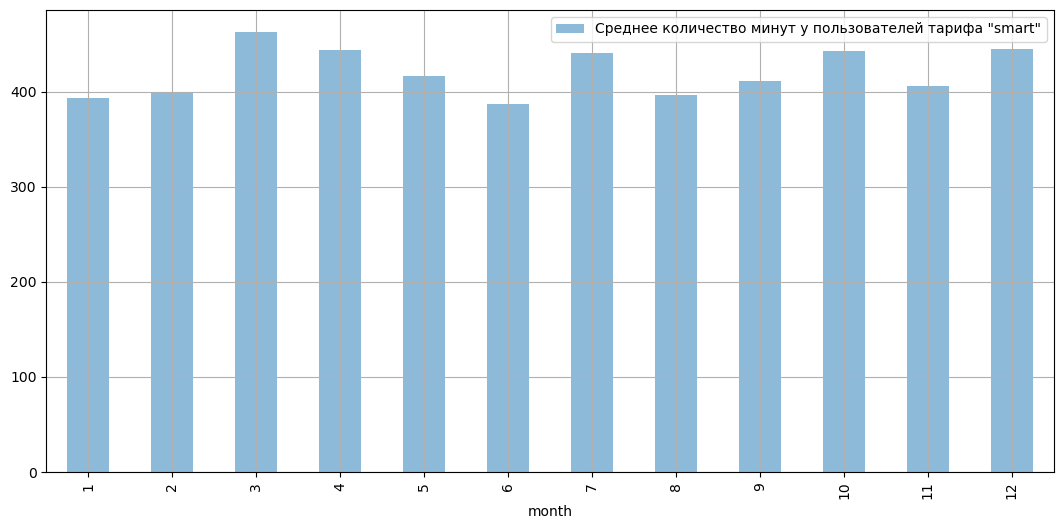

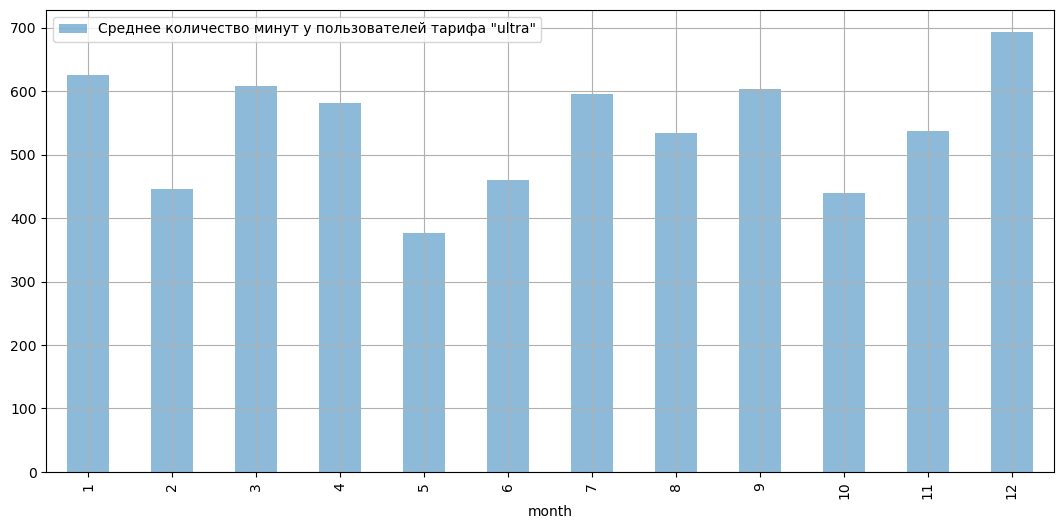

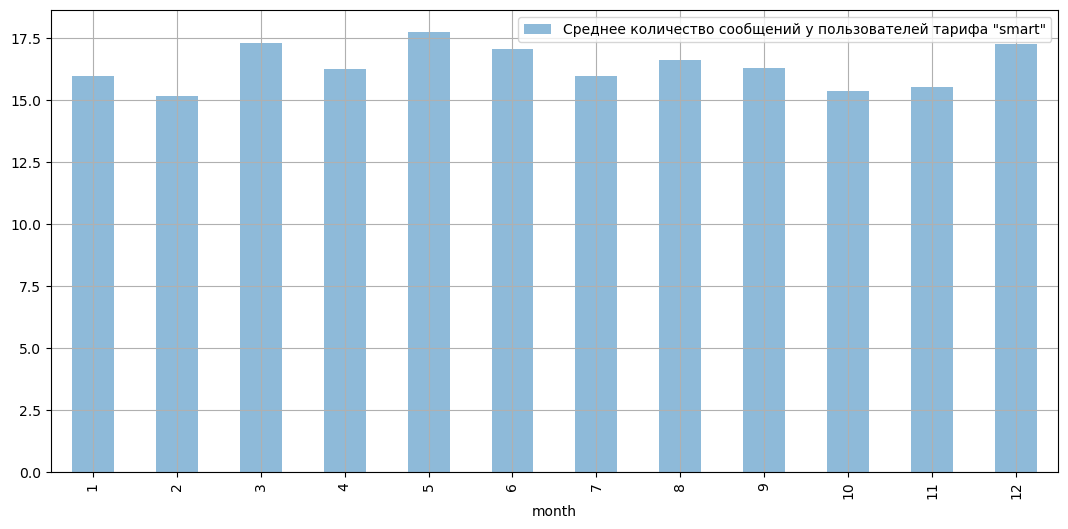

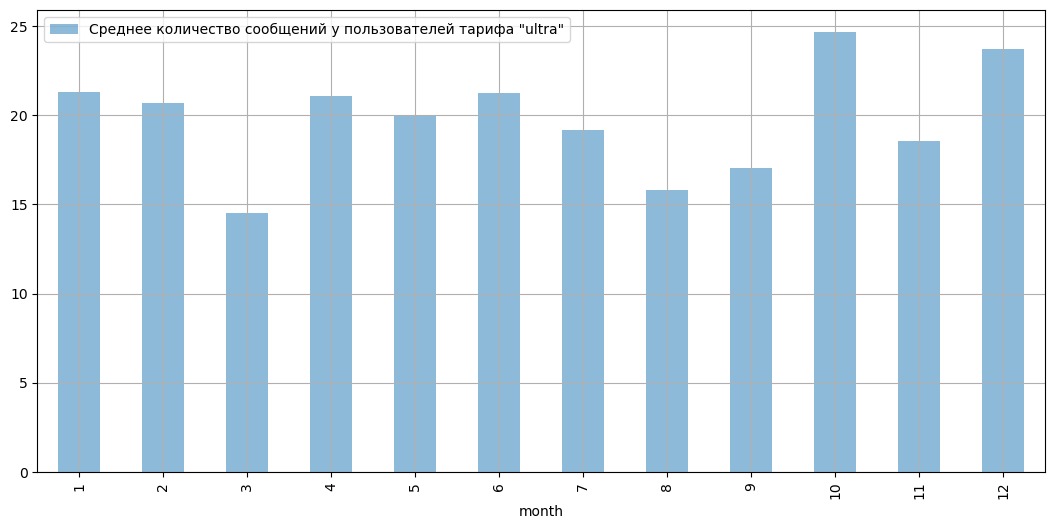

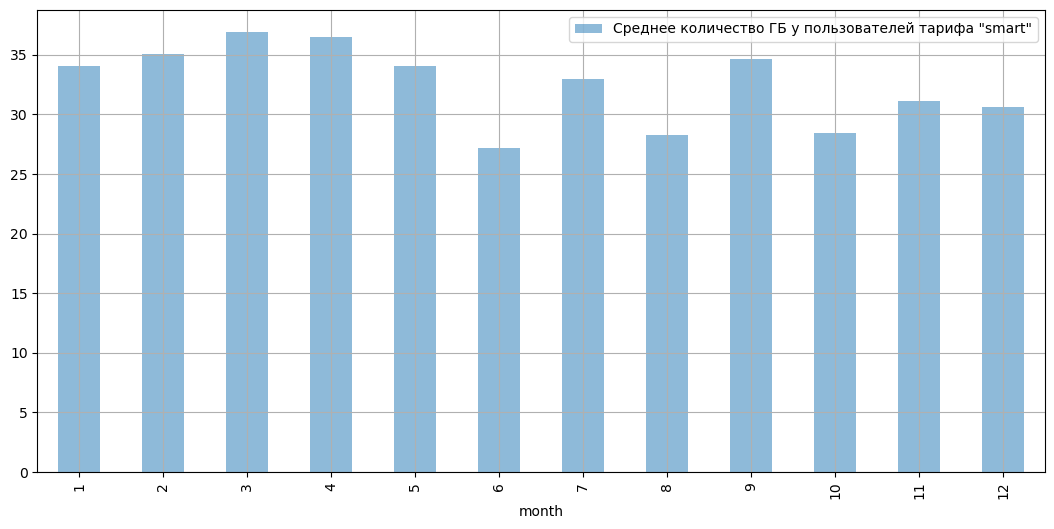

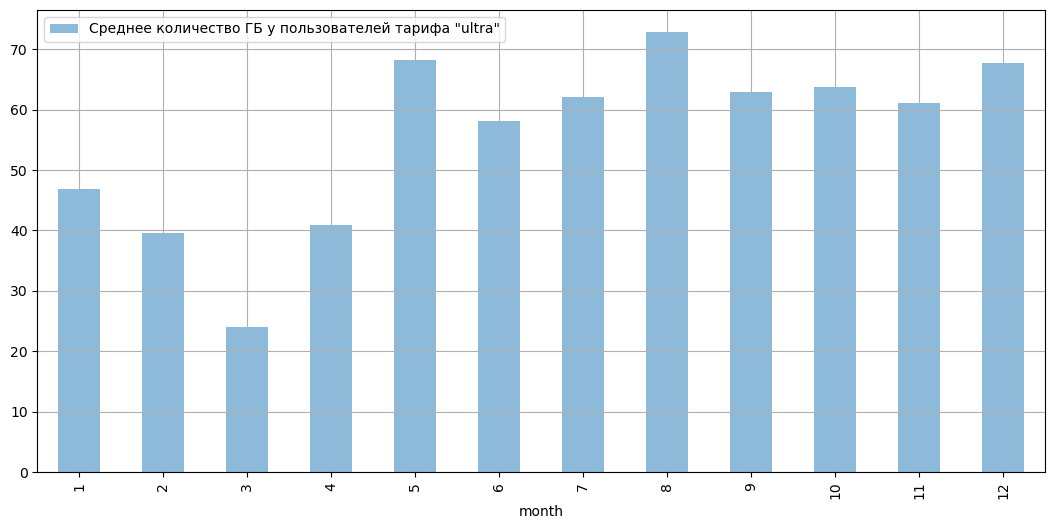

In [22]:
mean_smart.plot(y='duration_mean',grid=True,figsize=(13,6),style='o-',kind='bar', label='Среднее количество минут у пользователей тарифа "smart"', alpha=0.5)
mean_ultra.plot(y='duration_mean',grid=True,figsize=(13,6),style='o-',kind='bar', label='Среднее количество минут у пользователей тарифа "ultra"',alpha=0.5)

mean_smart.plot(y='messages_mean',grid=True,figsize=(13,6),style='o-',kind='bar', label='Среднее количество сообщений у пользователей тарифа "smart"', alpha=0.5)
mean_ultra.plot(y='messages_mean',grid=True,figsize=(13,6),style='o-',kind='bar', label='Среднее количество сообщений у пользователей тарифа "ultra"',alpha=0.5)

mean_smart.plot(y='internet_mean',grid=True,figsize=(13,6),style='o-',kind='bar', label='Среднее количество ГБ у пользователей тарифа "smart"', alpha=0.5)
mean_ultra.plot(y='internet_mean',grid=True,figsize=(13,6),style='o-',kind='bar', label='Среднее количество ГБ у пользователей тарифа "ultra"',alpha=0.5)

**Промежуточный вывод:**

Видно, что в среднем пользователей Smart люди используют практически все пакетные минуты тарифа, в то же время пользователи Ultra в среднем используют меньше 1/3 от возможности минут своего пакета.

Смс люди особо не используют, а вот ГБ охотно в среднем выходят за тарифный пакет

In [23]:
# расчет дисперсии
df_disp_united = df_united.pivot_table(
    index=['tariff',  'month'],
    values=['duration_sum', 'messages_count', 'internet_sum'],
    aggfunc=lambda x: np.var(x, ddof=1),
    margins=True,

)

df_disp_united.columns = ['duration_disp', 'internet_disp', 'message_disp']
df_disp_united  

duration_disp  internet_disp  message_disp
tariff month                                            
smart  1       35379.401242      26.633246    532.736573
       2       31821.480381      31.746221   1029.689474
       3       27443.350627      25.167474    649.184211
       4       28001.554034      22.122094    696.700305
       5       32731.094285      34.960110   1132.630890
       6       36180.594777      37.836956    580.310564
       7       34008.236672      31.500951    850.746206
       8       46668.474007      32.806636    799.721471
       9       40291.347992      43.412336   1066.335618
       10      58375.194081      58.619772    726.931199
       11      72590.576171      85.726066   1185.209294
       12      22190.769231      12.584046    731.165242
ultra  1       82625.197816      74.568241   1463.801344
       2       93497.377199     118.995781   2379.555131
       3       30049.144246      36.856530    558.924270
       4       76248.202630      82.963423   1904.139752
       5      134138.868909     114.139671   3669.698010
       6      120420.592982      85.466514   1724.322349
       7       65524.160976     134.010976   2825.245122
       8      139985.607726      80.658675   1629.551282
       9      131288.840336     120.616807   3375.616807
       10     112513.044828      99.540230   4726.355172
       11     176522.717241     168.460920   2591.291954
       12      75700.142857      48.571429   2843.904762
All            58520.437688      54.747731   1306.701442

In [24]:
# составим сводную таблицу для расчета стандартного отклонения
df_std_united = df_united.pivot_table(
    index=['tariff', 'month'],
    values=['duration_sum', 'messages_count', 'internet_sum'],
    aggfunc=lambda x: np.std(x, ddof=1),
    margins=True,
)


df_std_united.columns = ['duration_std', 'internet_std', 'messages_std']
df_std_united

duration_std  internet_std  messages_std
tariff month                                          
smart  1        188.094129      5.160741     23.081087
       2        178.385763      5.634379     32.088775
       3        165.660347      5.016719     25.479094
       4        167.336649      4.703413     26.395081
       5        180.917369      5.912708     33.654582
       6        190.211973      6.151175     24.089636
       7        184.413223      5.612571     29.167554
       8        216.028873      5.727708     28.279347
       9        200.727048      6.588804     32.654795
       10       241.609590      7.656355     26.961662
       11       269.426384      9.258837     34.426869
       12       148.965665      3.547400     27.040067
ultra  1        287.445991      8.635290     38.259657
       2        305.773408     10.908519     48.780684
       3        173.346890      6.070958     23.641579
       4        276.130771      9.108426     43.636450
       5        366.249736     10.683617     60.578032
       6        347.016704      9.244810     41.524961
       7        255.976876     11.576311     53.153035
       8        374.146506      8.981017     40.367701
       9        362.338019     10.982568     58.100059
       10       335.429642      9.976985     68.748492
       11       420.146067     12.979250     50.904734
       12       275.136589      6.969321     53.328274
All             241.909978      7.399171     36.148326

### Построение гистрограм

In [25]:
# Разобью пользователей по тарифам, для построения гистограм
df_user_smart = df_united.query('tariff=="smart"')
df_user_ultra = df_united.query('tariff=="ultra"')

display(df_user_smart)
display(df_user_ultra)


,user_id,calls_count,duration_sum,messages_count,internet_sum,age,city,tariff,month,revenue_endless
8,1001,59.0,430.0,0.0,18.0,41,Москва,smart,11,1150.0
9,1001,63.0,414.0,0.0,14.0,41,Москва,smart,11,550.0
10,1002,15.0,117.0,4.0,11.0,59,Стерлитамак,smart,6,550.0
11,1002,26.0,214.0,11.0,18.0,59,Стерлитамак,smart,6,1150.0
12,1002,42.0,289.0,13.0,20.0,59,Стерлитамак,smart,6,1550.0
...,...,...,...,...,...,...,...,...,...,...
3208,1489,0.0,0.0,17.0,11.0,35,Санкт-Петербург,smart,8,550.0
3209,1489,0.0,0.0,32.0,17.0,35,Санкт-Петербург,smart,8,950.0
3210,1489,0.0,0.0,21.0,20.0,35,Санкт-Петербург,smart,8,1550.0
3211,1489,0.0,0.0,20.0,18.0,35,Санкт-Петербург,smart,8,1150.0


,user_id,calls_count,duration_sum,messages_count,internet_sum,age,city,tariff,month,revenue_endless
0,1000,22.0,159.0,22.0,3.0,52,Краснодар,ultra,5,1950.0
1,1000,43.0,172.0,60.0,23.0,52,Краснодар,ultra,5,1950.0
2,1000,47.0,340.0,75.0,14.0,52,Краснодар,ultra,5,1950.0
3,1000,52.0,408.0,81.0,14.0,52,Краснодар,ultra,5,1950.0
4,1000,58.0,466.0,57.0,15.0,52,Краснодар,ultra,5,1950.0
...,...,...,...,...,...,...,...,...,...,...
3204,1473,0.0,0.0,19.0,17.0,18,Красноярск,ultra,8,1950.0
3205,1473,0.0,0.0,20.0,14.0,18,Красноярск,ultra,8,1950.0
3206,1473,0.0,0.0,14.0,22.0,18,Красноярск,ultra,8,1950.0
3207,1473,0.0,0.0,20.0,18.0,18,Красноярск,ultra,8,1950.0


C:\Users\Bazunov_Anton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bazunov_Anton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


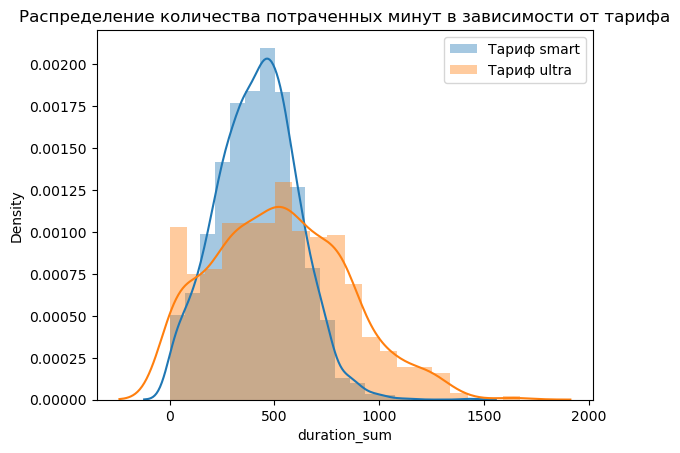

In [26]:

sns.distplot(df_user_smart['duration_sum'],bins=20, label='Тариф smart')
sns.distplot(df_user_ultra['duration_sum'],bins=20, label='Тариф ultra')

plt.title('Распределение количества потраченных минут в зависимости от тарифа')
plt.legend(loc='upper right')


C:\Users\Bazunov_Anton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bazunov_Anton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


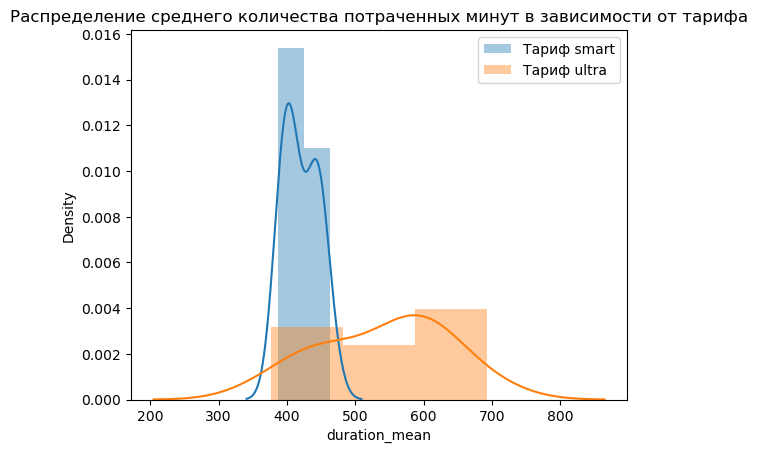

In [27]:
plt.title('Распределение среднего количества потраченных минут в зависимости от тарифа')
sns.distplot(mean_smart['duration_mean'], label='Тариф smart')
sns.distplot(mean_ultra['duration_mean'], label='Тариф ultra')
plt.legend(loc='upper right')



**Промежуточный вывод:**

Пользователей `смарт` как и проверили раньше больше, но у них более ярко выраженно среднее значение в 500 минут (большинство пользовтелей наговривает свой пакет минут)

Пользователей `ультра` более равномерно распределено время разговоров, очень мало (почти нет) тех кто говорит больше 1500 минут


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👌:</b> Верно подмечено!
</div>


C:\Users\Bazunov_Anton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bazunov_Anton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


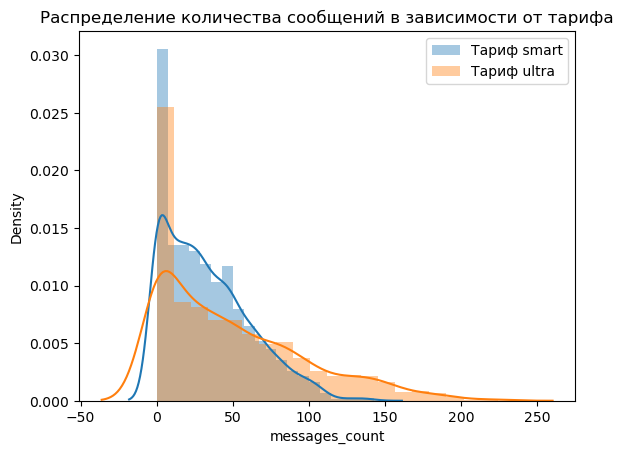

In [28]:
plt.title('Распределение количества сообщений в зависимости от тарифа')
sns.distplot(df_user_smart['messages_count'],bins=20, label='Тариф smart')
sns.distplot(df_user_ultra['messages_count'],bins=20, label='Тариф ultra')
plt.legend(loc='upper right')

C:\Users\Bazunov_Anton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bazunov_Anton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


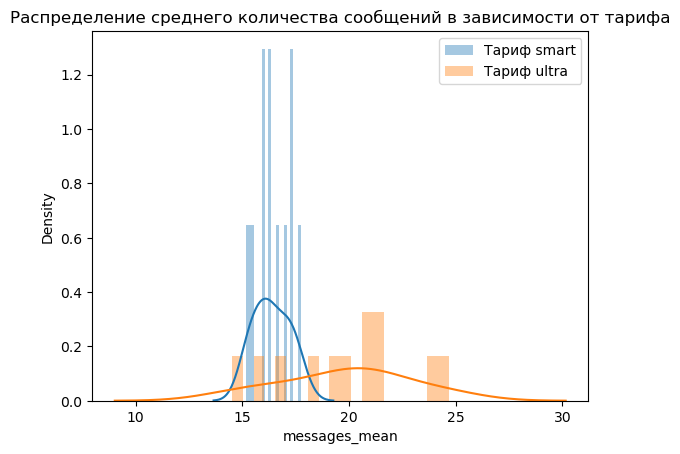

In [29]:
plt.title('Распределение среднего количества сообщений в зависимости от тарифа')
sns.distplot(mean_smart['messages_mean'],bins=20, label='Тариф smart')
sns.distplot(mean_ultra['messages_mean'],bins=20, label='Тариф ultra')
plt.legend(loc='upper right')

**Промежуточный вывод:**

Пользователи `смарт` практически не отправляют смс, а те кто отправляет примерно равное количество людей отправляют до 50 сообщений

Пользователи `ультра` меньшее количество количество людей не отправляет смс, но идет более плавное уменьшение


C:\Users\Bazunov_Anton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bazunov_Anton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


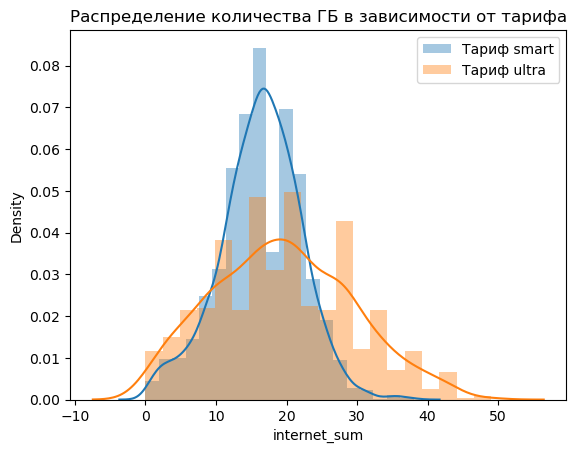

In [30]:
plt.title('Распределение количества ГБ в зависимости от тарифа')
sns.distplot(df_user_smart['internet_sum'],bins=20, label='Тариф smart')
sns.distplot(df_user_ultra['internet_sum'],bins=20, label='Тариф ultra')
plt.legend(loc='upper right')

C:\Users\Bazunov_Anton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bazunov_Anton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


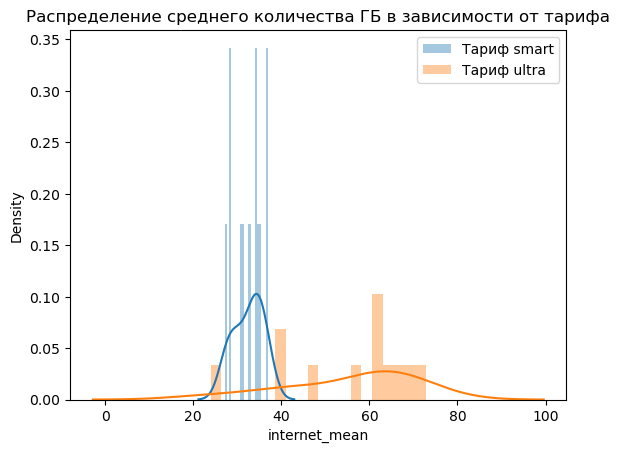

In [31]:
plt.title('Распределение среднего количества ГБ в зависимости от тарифа')
sns.distplot(mean_smart['internet_mean'],bins=20, label='Тариф smart')
sns.distplot(mean_ultra['internet_mean'],bins=20, label='Тариф ultra')
plt.legend(loc='upper right')

**Промежуточный вывод:**

Пользователи `смарт` после ~15 гигов идет большой провал, большинство пытается уложиться в пакет, но если не смогли то уже накаивают больше

Пользователи `ультра` забавно, что так же имеется скачек после ~15 гб

## Проверка гипотез

**Гипотеза:**
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

*Пороговое значение alpha задайте самостоятельно.*

**Поясните:**
* как вы формулировали нулевую и альтернативную гипотезы;
* какой критерий использовали для проверки гипотез и почему.

### Гипотеза - 1

* средняя выручка пользователей тарифов «Ультра» и «Смарт» **различаются**.

Для этого принимаем **Нулевую гипотезу**, что средняя выручка пользователей тарифов `Ультра` и `Смарт` **не различается**

In [32]:
#выбираем уровень статистической значимости = 5%
alpha = 0.05  


results=st.ttest_ind(df_user_smart['revenue_endless'],df_user_ultra['revenue_endless'],equal_var=False) 
print('p-значение:', results.pvalue)

# сравним получившееся p-значение с заданным уровнем статистической значимости
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")





p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


**Альтернативная гипотеза** средняя выручка пользователей тарифов `Ультра` больше чем у `Смарт`

In [33]:
mean_re_smart=df_user_smart['revenue_endless'].mean()


alpha = 0.05  

result=st.ttest_1samp(df_user_ultra['revenue_endless'],mean_re_smart) 
print('p-значение:', results.pvalue)

# сравним получившееся p-значение с заданным уровнем статистической значимости
if (result.pvalue/2<alpha) and (df_user_ultra['revenue_endless'].mean()>=mean_re_smart):
    print('Отвергаем альтернативную гипотезу')
else:
    print('Не получилость отвергнуть альтернативную гипотезу')

p-значение: 4.2606313931076085e-250
Отвергаем альтернативную гипотезу


Если выручки по тарифам не равны, и если `Ультра` не больше чем у `Смарт`, получается 3-я гипотеза, что `Смарт` > `Ультра`
В алтернативной односторонней гипотезе мы проверяли на условии:
* среднее значение выручки `Ультра` >= `Смарт`
* разница среднего значения и статистической значимости деленой пополам была существенной


### Гипотеза - 2

* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Для этого принимаем **Нулевую гипотезу**, что средняя выручка пользователей из `Москвы` **не различается**

In [34]:
Msk_revenue_endless = df_united.loc[df_united['city'] == 'Москва', 'revenue_endless']
NoMsk_revenue_endless = df_united.loc[df_united['city'] != 'Москва', 'revenue_endless']

print(Msk_revenue_endless.sort_values(), '\n')
print(NoMsk_revenue_endless.sort_values(), '\n')

#выбираем уровень статистической значимости = 5%
alpha = 0.05  

results = st.ttest_ind(Msk_revenue_endless, NoMsk_revenue_endless, equal_var=False)
print('p-значение:', results.pvalue)

# сравним получившееся p-значение с заданным уровнем статистической значимости
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1300     550.0
1860     550.0
1094     550.0
494      550.0
1858     550.0
         ...  
2215    3750.0
1147    3900.0
1884    4050.0
1452    4116.0
1793    5321.0
Name: revenue_endless, Length: 611, dtype: float64 

1560     550.0
2146     550.0
2185     550.0
2196     550.0
1225     550.0
         ...  
1000    5252.0
1622    5672.0
3105    5680.0
260     5709.0
3106    6770.0
Name: revenue_endless, Length: 2603, dtype: float64 

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Нет подтверждения, что выручка пользователей в Мск отличается от остальных городов.

## Общий вывод

В результате исследования были выявлен ряд явных и неявных ошибок. Была проведена работа по предобработке данных. Часть данных требует уточнения у заказчика. Подготовил дополнительные данные для облегчения обработки данных в дальнейшем.

В результате можно сделать следующие выводы:

* Пользователей `Смарт` в два раза больше чем `Ультра`
* Большинство пользователей `Смарт` выжимает возможности своего тарифа по максимуму
* Смс люди особо не используют в независимости от тарифа
* ГБ охотно в среднем выходят за тарифный пакет

**Странные советы**

Ввести тариф `Смарт+` с большим количеством минут - 800 минут (пользователи `Ультра` могут не перейти так как многие используют больше 1000 минут. Стоимостью выше тем самым выбирая между 3-х дорогих вариантов, пользователь может склоняться к более дорогому.

